In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import pandas as pd
from pathlib import Path
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
Am=pd.read_csv('Accra_vectorcapacity_Tm.csv') #monthly mean temp.
Km=pd.read_csv('Kumasi_vectorcapacity_Tm.csv')
Nm=pd.read_csv('Navrongo_vectorcapacity_Tm.csv')
Tm=pd.read_csv('Tamale_vectorcapacity_Tm.csv')

In [4]:
An=pd.read_csv('Accra_vectorcapacity_Tn.csv')# Monthly mean min temp.
Kn=pd.read_csv('Kumasi_vectorcapacity_Tn.csv')
Nn=pd.read_csv('Navrongo_vectorcapacity_Tn.csv')
Tn=pd.read_csv('Tamale_vectorcapacity_Tn.csv')

In [5]:
Ax=pd.read_csv('Accra_vectorcapacity_Tx.csv')# Monthly mean max temp.
Kx=pd.read_csv('Kumasi_vectorcapacity_Tx.csv')
Nx=pd.read_csv('Navrongo_vectorcapacity_Tx.csv')
Tx=pd.read_csv('Tamale_vectorcapacity_Tx.csv')

In [6]:

mon=['Jan', 'Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [7]:
AM=Am[["vc", "month"]].set_index("month")
KM=Km[["vc", "month"]].set_index("month")
NM=Nm[["vc", "month"]].set_index("month")
TM=Tm[["vc", "month"]].set_index("month")

In [8]:
data=xr.open_dataset('chirps_21_WA_new.nc')

In [9]:
gh=data.precip.sel(time=slice('1981-01-01','2020-12-31'),longitude=slice(-3.5,1.5), latitude=slice(4, 11.5))

In [10]:
# gh.latitude

In [11]:
Ac_co=gh.sel(longitude=-0.2, latitude=5.5, method='nearest')

In [12]:
am=Ac_co.groupby('time.month').mean()#monthly mean

In [13]:
# am

In [14]:
Ac_x=Ac_co.resample(time='m').max()# Monthly max values

In [15]:
# Ac_x

In [16]:
ax=Ac_x.groupby('time.month').mean() # Monthly mean max values

In [17]:
# ax

In [18]:
Ac_n=Ac_co.resample(time='m').min() # Monthly min values

In [19]:
# Ac_n

In [20]:
an=Ac_n.groupby('time.month').mean()# Monthly mean min values

In [21]:
# an

In [25]:
Ta_c=gh.sel(longitude=(-0.8), latitude=9.4, method='nearest')

In [118]:
tm=Ta_c.groupby('time.month').mean()

In [44]:
# tm

In [97]:
Ta_x=Ta_c.resample(time='m').max()# Monthly max values

In [99]:
# Ta_x

In [100]:
tx=Ta_x.groupby('time.month').mean() # Monthly mean max values

In [102]:
# tx

In [103]:
Ta_n=Ta_c.resample(time='m').min() # Monthly min values

In [105]:
# Ta_n

In [106]:
tn=Ta_n.groupby('time.month').mean() # Monthly mean min values

In [108]:
# tn

In [39]:
Na_c=gh.sel(longitude=(-1.1), latitude=10.9, method='nearest')

In [120]:
nm=Na_c.groupby('time.month').mean() # Monthly mean values

In [71]:
# nm


In [56]:
Na_x=Na_c.resample(time='m').max()# Monthly max values

In [58]:
# Na_x

In [61]:
nx=Na_x.groupby('time.month').mean() # Monthly mean max values

In [70]:
# nx

In [63]:
Na_n=Na_c.resample(time='m').min() # Monthly min values

In [69]:
# Na_n

In [66]:
nn=Na_n.groupby('time.month').mean()# Monthly mean min values

In [68]:
# nn

In [31]:
Ku_c=gh.sel(longitude=(-1.6), latitude=6.7, method='nearest')

In [121]:
km=Ku_c.groupby('time.month').mean()

In [48]:
# km

In [72]:
Ku_x=Ku_c.resample(time='m').max()# Monthly max values

In [74]:
# Ku_x

In [75]:
kx=Ku_x.groupby('time.month').mean() # Monthly mean max values

In [77]:
# kx

In [78]:
Ku_n=Ku_c.resample(time='m').min() # Monthly min values

In [80]:
# Ku_n

In [81]:
kn=Ku_n.groupby('time.month').mean()# Monthly mean min values

In [83]:
# kn

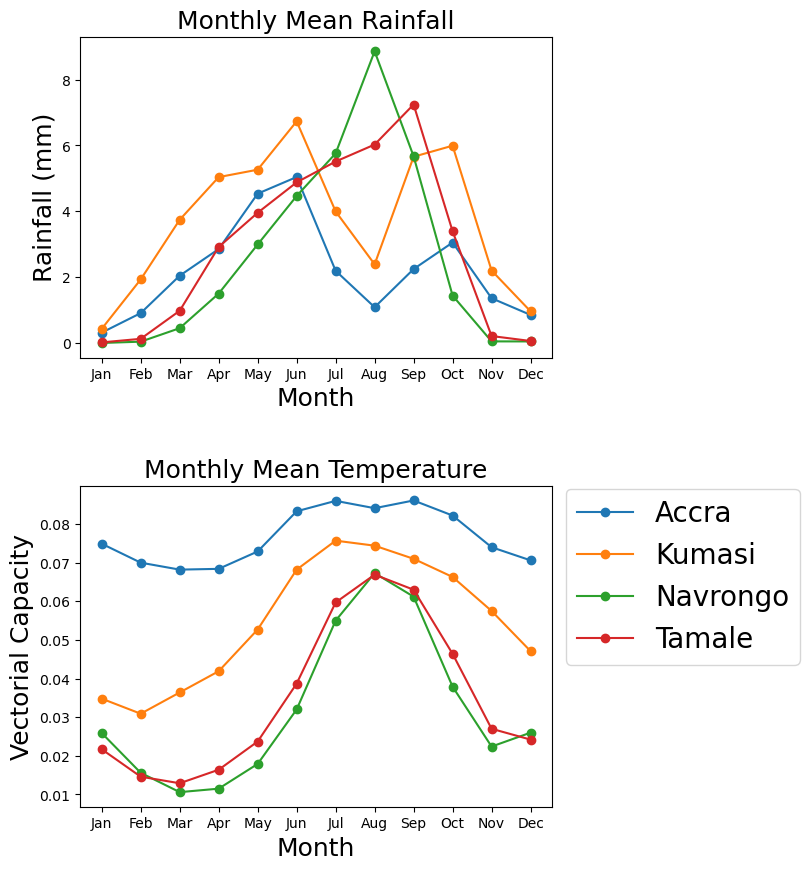

In [145]:
fig,axes=plt.subplots(figsize=(14,10), ncols=2, nrows=2, linewidth=10)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
x1 = axes[0,0]
x1.plot(mon,am, label='Accra', marker='o')
x1.plot(mon,km, label='Kumasi', marker='o')
x1.plot(mon,nm, label='Navrongo', marker='o')
x1.plot(mon,tm, label='Tamale', marker='o')
# x1.legend(loc='lower left',bbox_to_anchor=(1,0.38),fontsize=30)#'xx-large'
x1.set_ylabel('Rainfall (mm)',fontsize=18)
x1.set_xlabel('Month',fontsize=18)
x1.set_title('Monthly Mean Rainfall',fontsize=18)

x2 = axes[1,0]
x2.plot(mon,AM, label='Accra', marker='o')
x2.plot(mon,KM, label='Kumasi', marker='o')
x2.plot(mon,NM, label='Navrongo', marker='o')
x2.plot(mon,TM, label='Tamale', marker='o')
x2.legend(loc='lower left',bbox_to_anchor=(1,0.40),fontsize=20)#'xx-large'
x2.set_ylabel('Vectorial Capacity',fontsize=18)
x2.set_xlabel('Month',fontsize=18)
x2.set_title('Monthly Mean Temperature',fontsize=18)

# x1.plot(mon,an, label='Accra', marker='o')
# x1.plot(mon,kn, label='Kumasi', marker='o')
# x1.plot(mon,nn, label='Navrongo', marker='o')
# x1.plot(mon,tn, label='Tamale', marker='o')
# x1.set_title('Minimun Rainfall',fontsize=18)
# x1.set_ylabel('Vectorial Capacity',fontsize=18)
# x1.set_xlabel('Month',fontsize=18)
# # x1.legend(loc='lower left',bbox_to_anchor=(1,0.70))


x3=axes[0,1].set_visible(False);x4=axes[1,1].set_visible(False)
plt.savefig('R_VC.tiff')

Text(0.5, 1.0, 'Monthly Mean Rainfall')

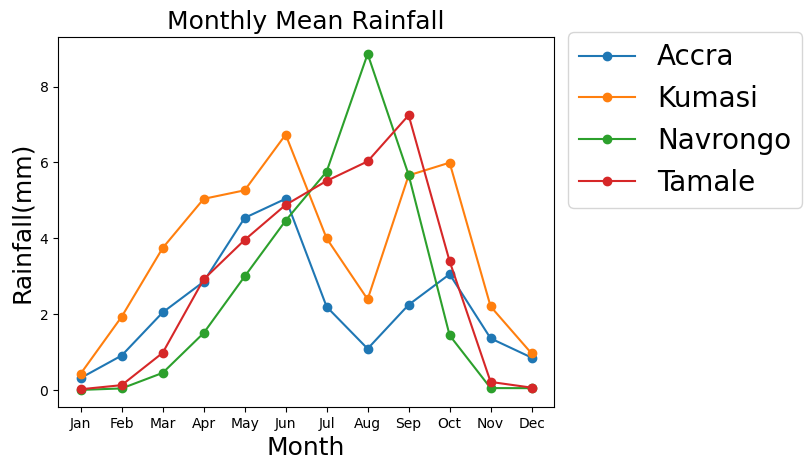

In [130]:
plt.plot(mon,am, label='Accra', marker='o')
plt.plot(mon,km, label='Kumasi', marker='o')
plt.plot(mon,nm, label='Navrongo', marker='o')
plt.plot(mon,tm, label='Tamale', marker='o')
plt.legend(loc='lower left',bbox_to_anchor=(1,0.50),fontsize=20)#'xx-large'
plt.ylabel('Rainfall(mm)',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.title('Monthly Mean Rainfall',fontsize=18)


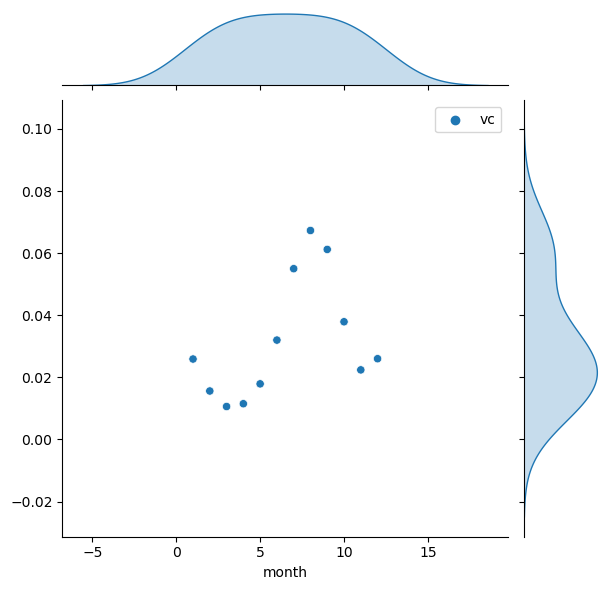

In [52]:
sns.jointplot(NM)

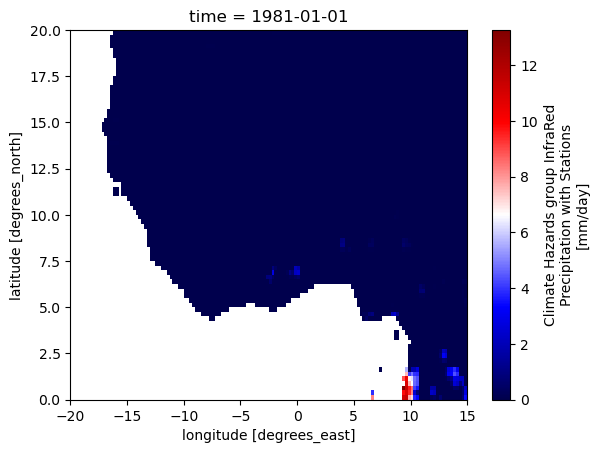

In [40]:
data.precip.sel(time='1981-01-01').plot(cmap='seismic',alpha=1)

In [42]:
ds=data.precip

In [43]:
ds_s=ds.sel(time=slice('1981-12-31','1991-12-31'),longitude=slice(-3.5,1.5), latitude=slice(4,11.5))

In [44]:
ds_m=ds_s.groupby('time.month').mean()


In [45]:
# ds_m

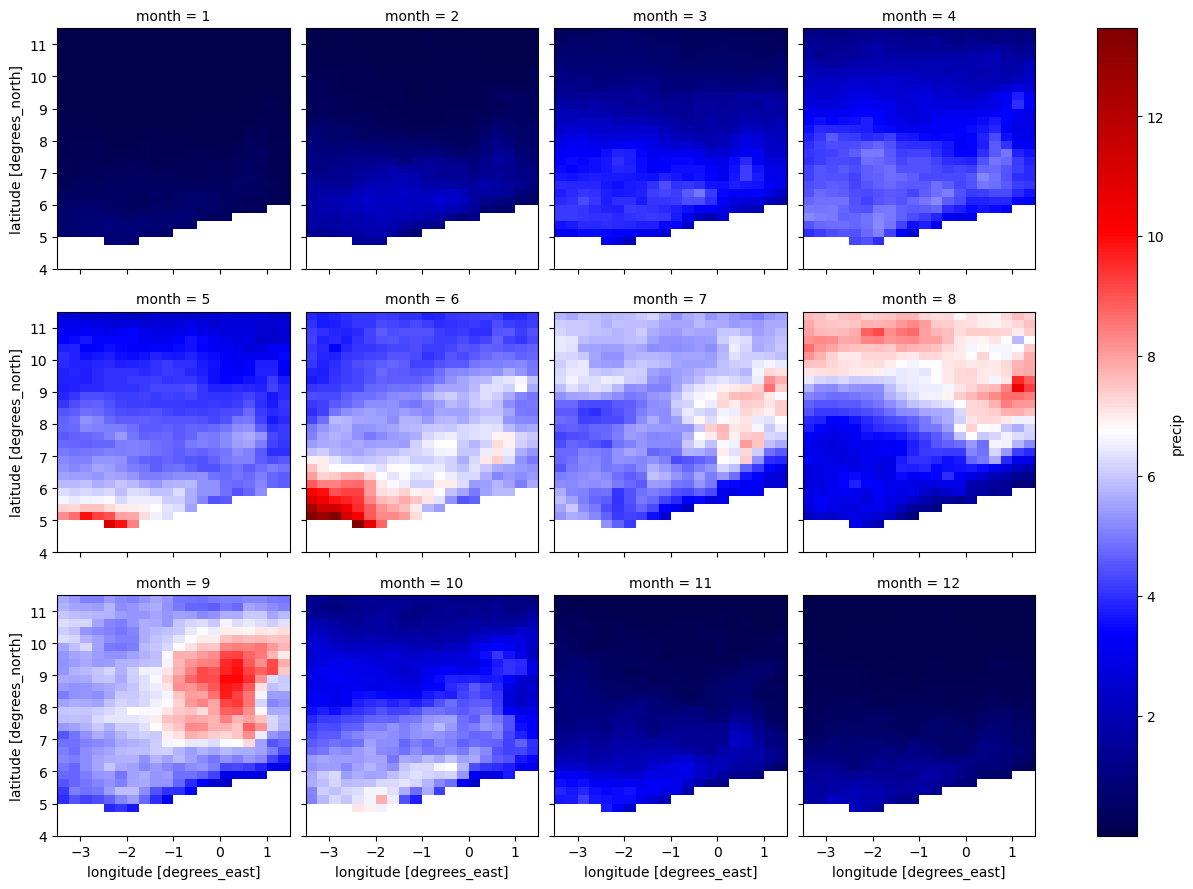

In [46]:
ds_m.plot(x='longitude', y='latitude', col='month', col_wrap=4,cmap='seismic')


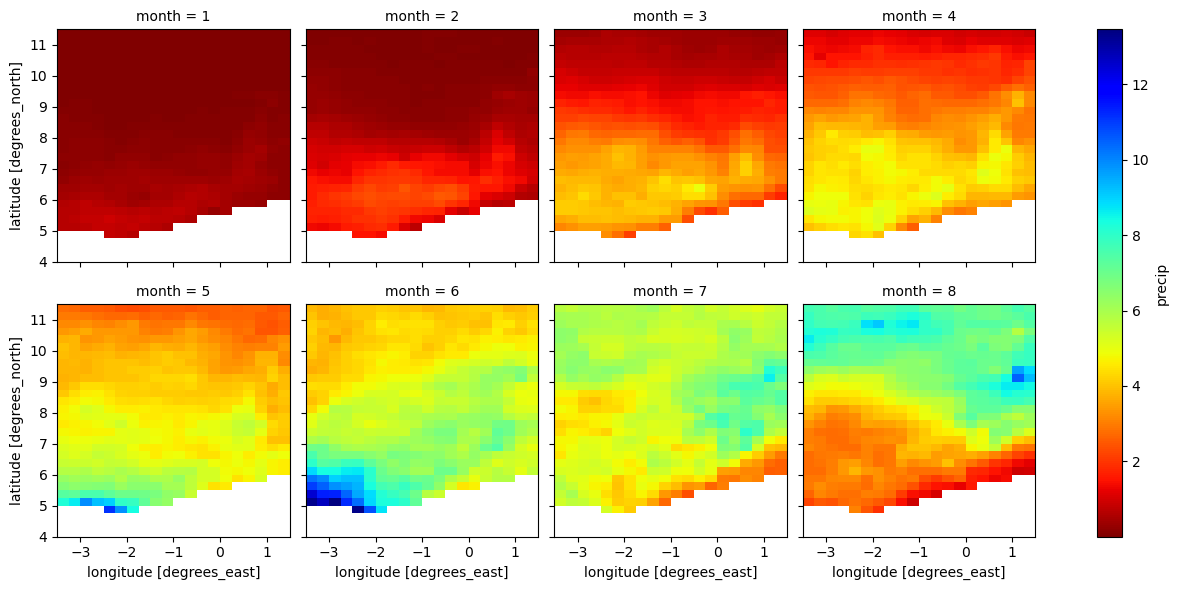

In [47]:
ds_m[:8].plot(x='longitude', y='latitude', col='month', col_wrap=4,cmap='jet_r')


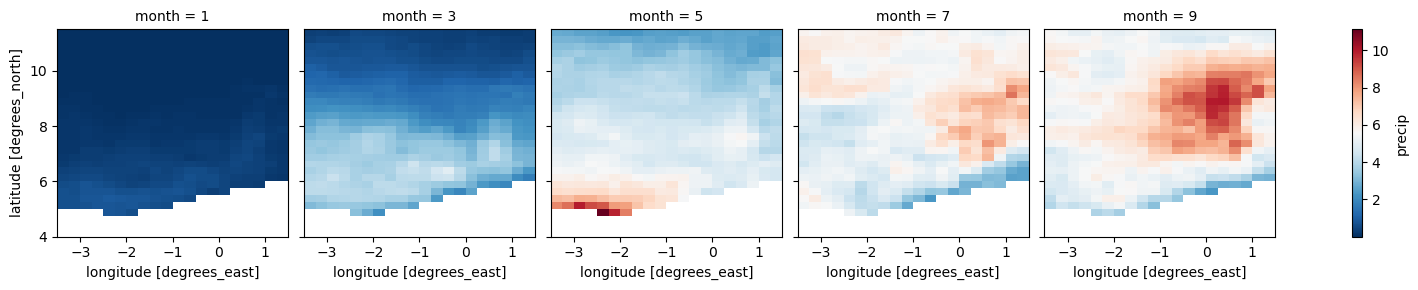

In [11]:
ds_m.sel(month=[1,3,5,7,9]).plot(x='longitude', y='latitude', col='month', col_wrap=5,cmap='RdBu_r')


In [12]:
ds_y=ds.groupby('time.year').mean()

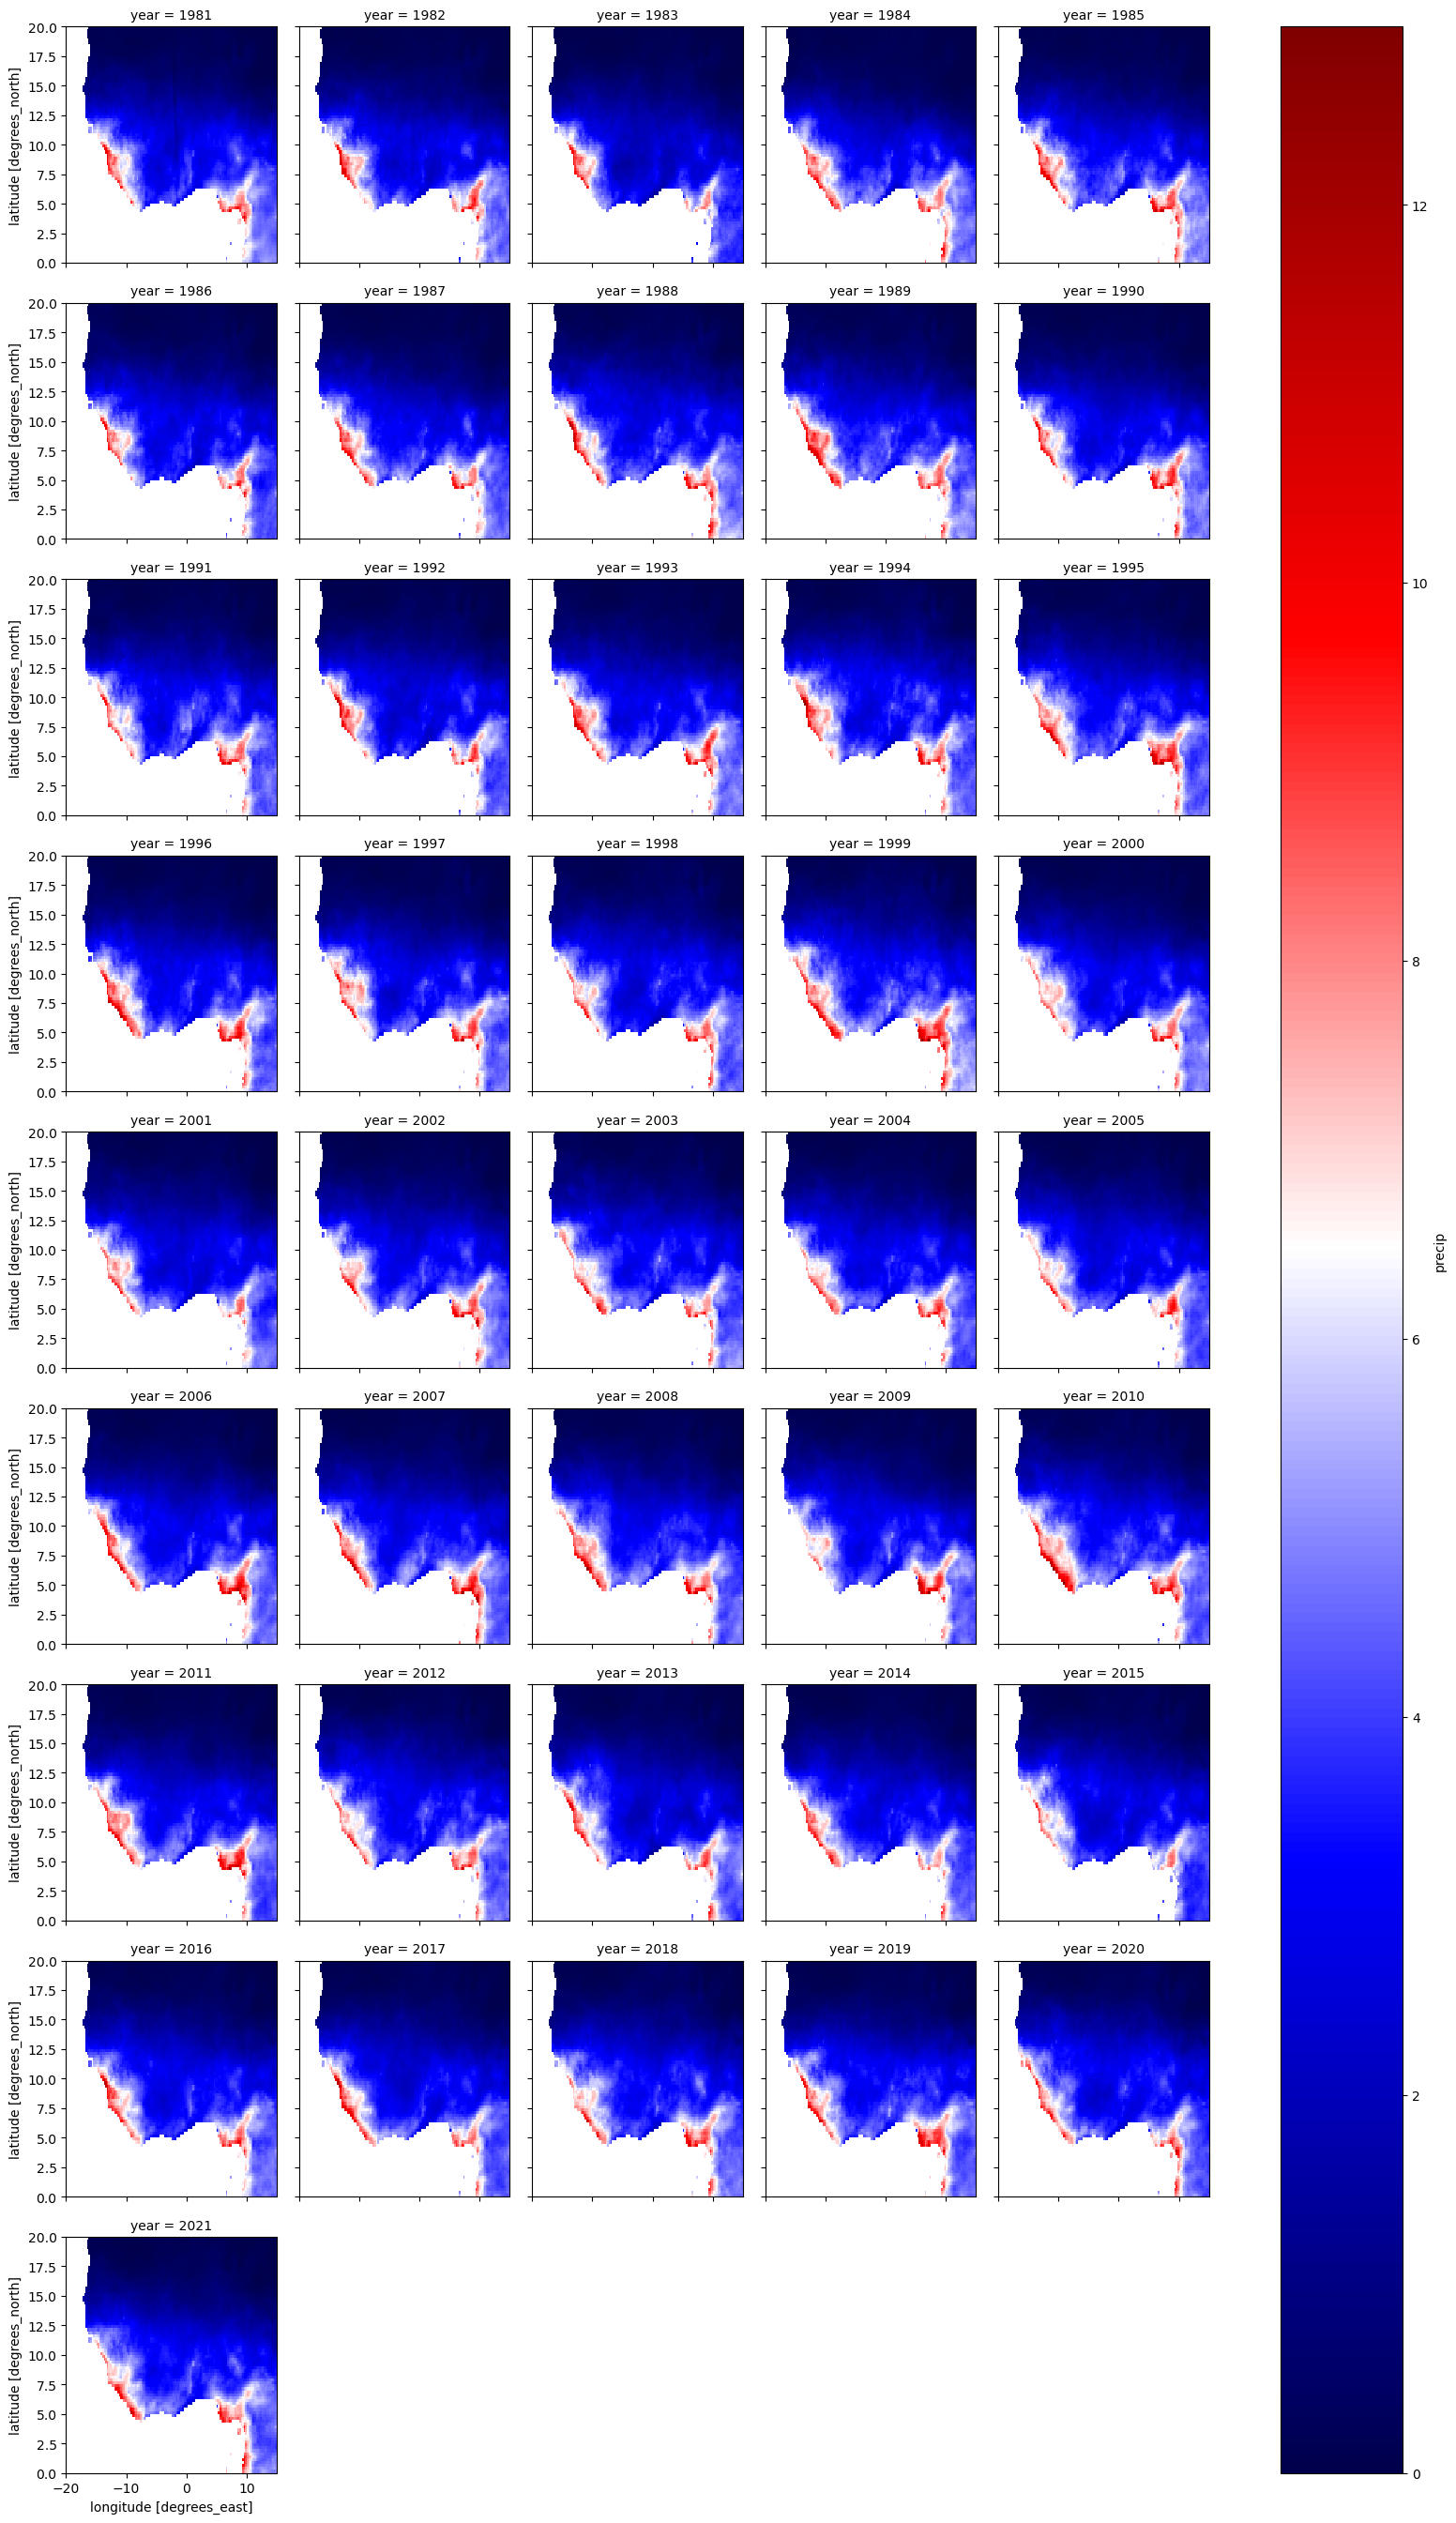

In [13]:
ds_y.plot(x='longitude', y='latitude', col='year', col_wrap=5,cmap='seismic')


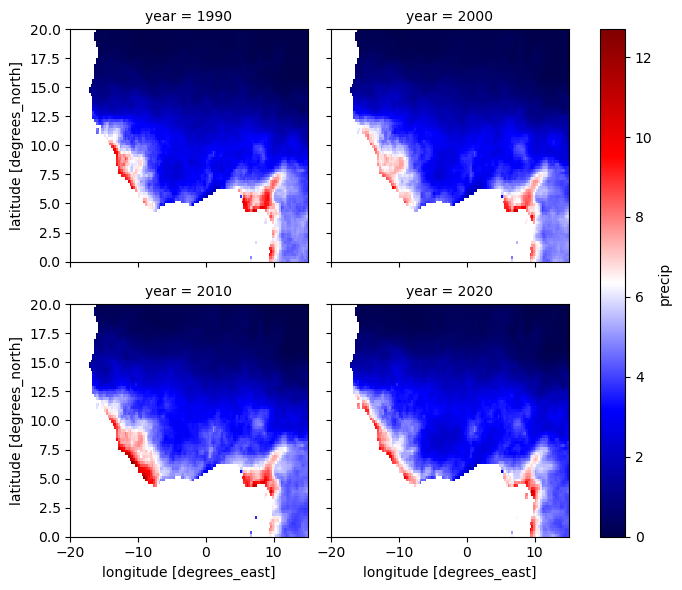

In [14]:
#Study area
ds_y.sel(year=[1990,2000,2010,2020]).plot(x='longitude', y='latitude', col='year', col_wrap=2,cmap='seismic')


In [15]:
ds_seas=ds.groupby('time.season').mean()

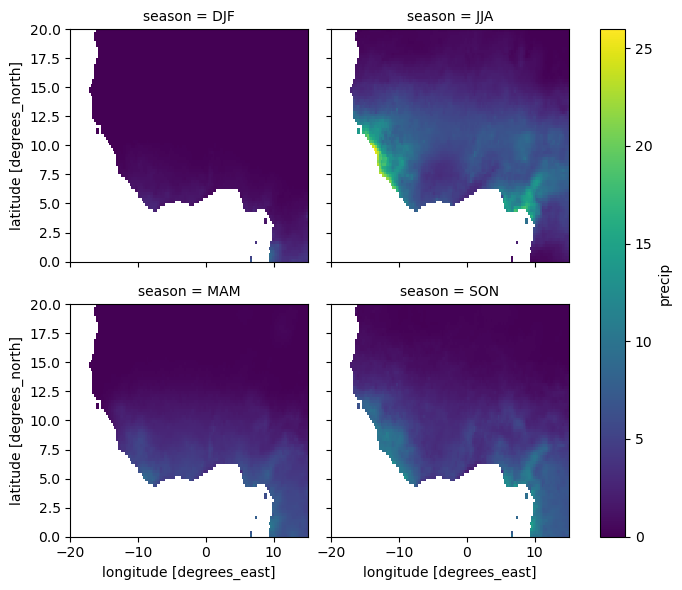

In [16]:
ds_seas.plot(x='longitude', y='latitude', col='season', col_wrap=2,cmap='viridis')


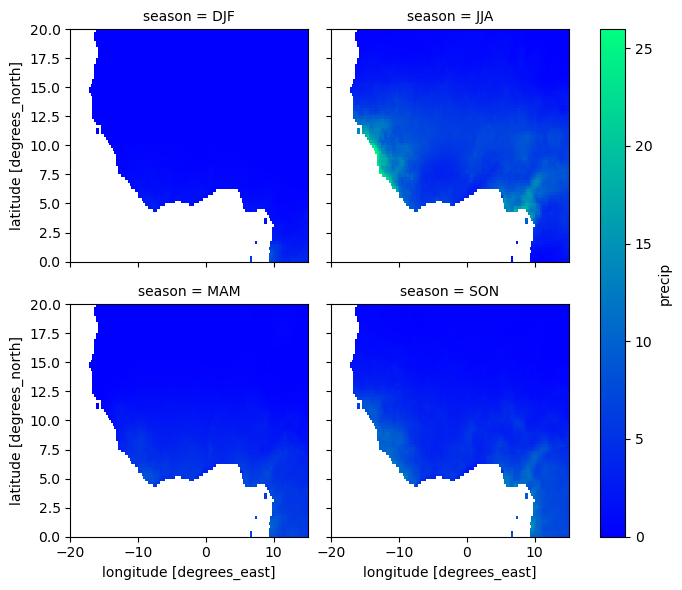

In [17]:
ds_seas.plot(x='longitude', y='latitude', col='season', col_wrap=2,cmap='winter')


In [18]:
# dd=ds.mean(dim=['longitude','latitude'])